# Identifying and Recommending Best Restaurants

Problem Statement
A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_excel('data.xlsx')

In [5]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [6]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63
9547,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34
9548,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127
9549,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78
9550,18246202,VNS Live Studio,1,Varanasi,"Hotel Varuna Ground Floor, 22 Gulab Bagh, Sigr...",Sigra,"Sigra, Varanasi",82.991694,25.318345,"Chinese, North Indian",0,Indian Rupees(Rs.),No,No,1,3.5,Yellow,Good,109


In [7]:
data.shape

(9551, 19)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [9]:
#checking null values

data.isna().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
#percentage of missing value
missing_value=data.isna().sum()
total_values = np.product(data.shape)

In [11]:
percentage_missing = (missing_value.sum() / total_values) * 100

In [12]:
percentage_missing_per_column = (missing_value / len(data)) * 100

print("Percentage of missing values in the entire DataFrame:", percentage_missing)
print("\nPercentage of missing values per column:")
print(percentage_missing_per_column)

Percentage of missing values in the entire DataFrame: 0.005510583074795144

Percentage of missing values per column:
Restaurant ID           0.000000
Restaurant Name         0.010470
Country Code            0.000000
City                    0.000000
Address                 0.000000
Locality                0.000000
Locality Verbose        0.000000
Longitude               0.000000
Latitude                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Currency                0.000000
Has Table booking       0.000000
Has Online delivery     0.000000
Price range             0.000000
Aggregate rating        0.000000
Rating color            0.000000
Rating text             0.000000
Votes                   0.000000
dtype: float64


#### Observation

overall data has only 0.55% missing value with respect to 9% in cuisines and 1 % in restaurant name

In [14]:
# remove missing value

data=data.dropna()
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [16]:
#check duplicate records

print(data.nunique())

Restaurant ID           9541
Restaurant Name         7436
Country Code              15
City                     140
Address                 8909
Locality                1206
Locality Verbose        1263
Longitude               8110
Latitude                8667
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64


# Importing Country Code from another data file:


In [18]:
code = pd.read_excel("Country-Code.xlsx")


In [19]:
code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


# Merging the file:


In [21]:
final_data = pd.merge(data, code, on = 'Country Code', how = 'left')

In [22]:
final_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9536,18279289,BMG - All Day Dining,1,Dehradun,"140 A, Rajpur Road, Jakhan, Dehradun",Jakhan,"Jakhan, Dehradun",78.068890,30.362686,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,1,4.3,Green,Very Good,63,India
9537,2300497,Atmosphere Grill Cafe Sheesha,1,Kanpur,"8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...",Mall Road,"Mall Road, Kanpur",80.354002,26.472001,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,1,3.6,Yellow,Good,34,India
9538,18312106,UrbanCrave,1,Kanpur,"14/125, The Mall, Mall Road, Colonelganj, Para...",Parade,"Parade, Kanpur",80.342796,26.474986,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,1,3.9,Yellow,Good,127,India
9539,3900245,Deena Chat Bhandar,1,Varanasi,"D-47/184, Luxa Road, Dashaswmedh Road, Varanasi",Dashaswmedh Road,"Dashaswmedh Road, Varanasi",0.000000,0.000000,Street Food,0,Indian Rupees(Rs.),No,No,1,3.8,Yellow,Good,78,India


In [23]:
#check duplicates
print(data.nunique())

Restaurant ID           9541
Restaurant Name         7436
Country Code              15
City                     140
Address                 8909
Locality                1206
Locality Verbose        1263
Longitude               8110
Latitude                8667
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64


In [24]:
final_data=final_data.drop_duplicates(subset=['Restaurant ID'])

In [25]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9541 entries, 0 to 9540
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating     

## Finding cities with the maximum and minimum number of restaurants:


In [27]:
final_data['City'].value_counts()


City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Consort              1
Lincoln              1
Monroe               1
Potrero              1
Lakes Entrance       1
Name: count, Length: 140, dtype: int64

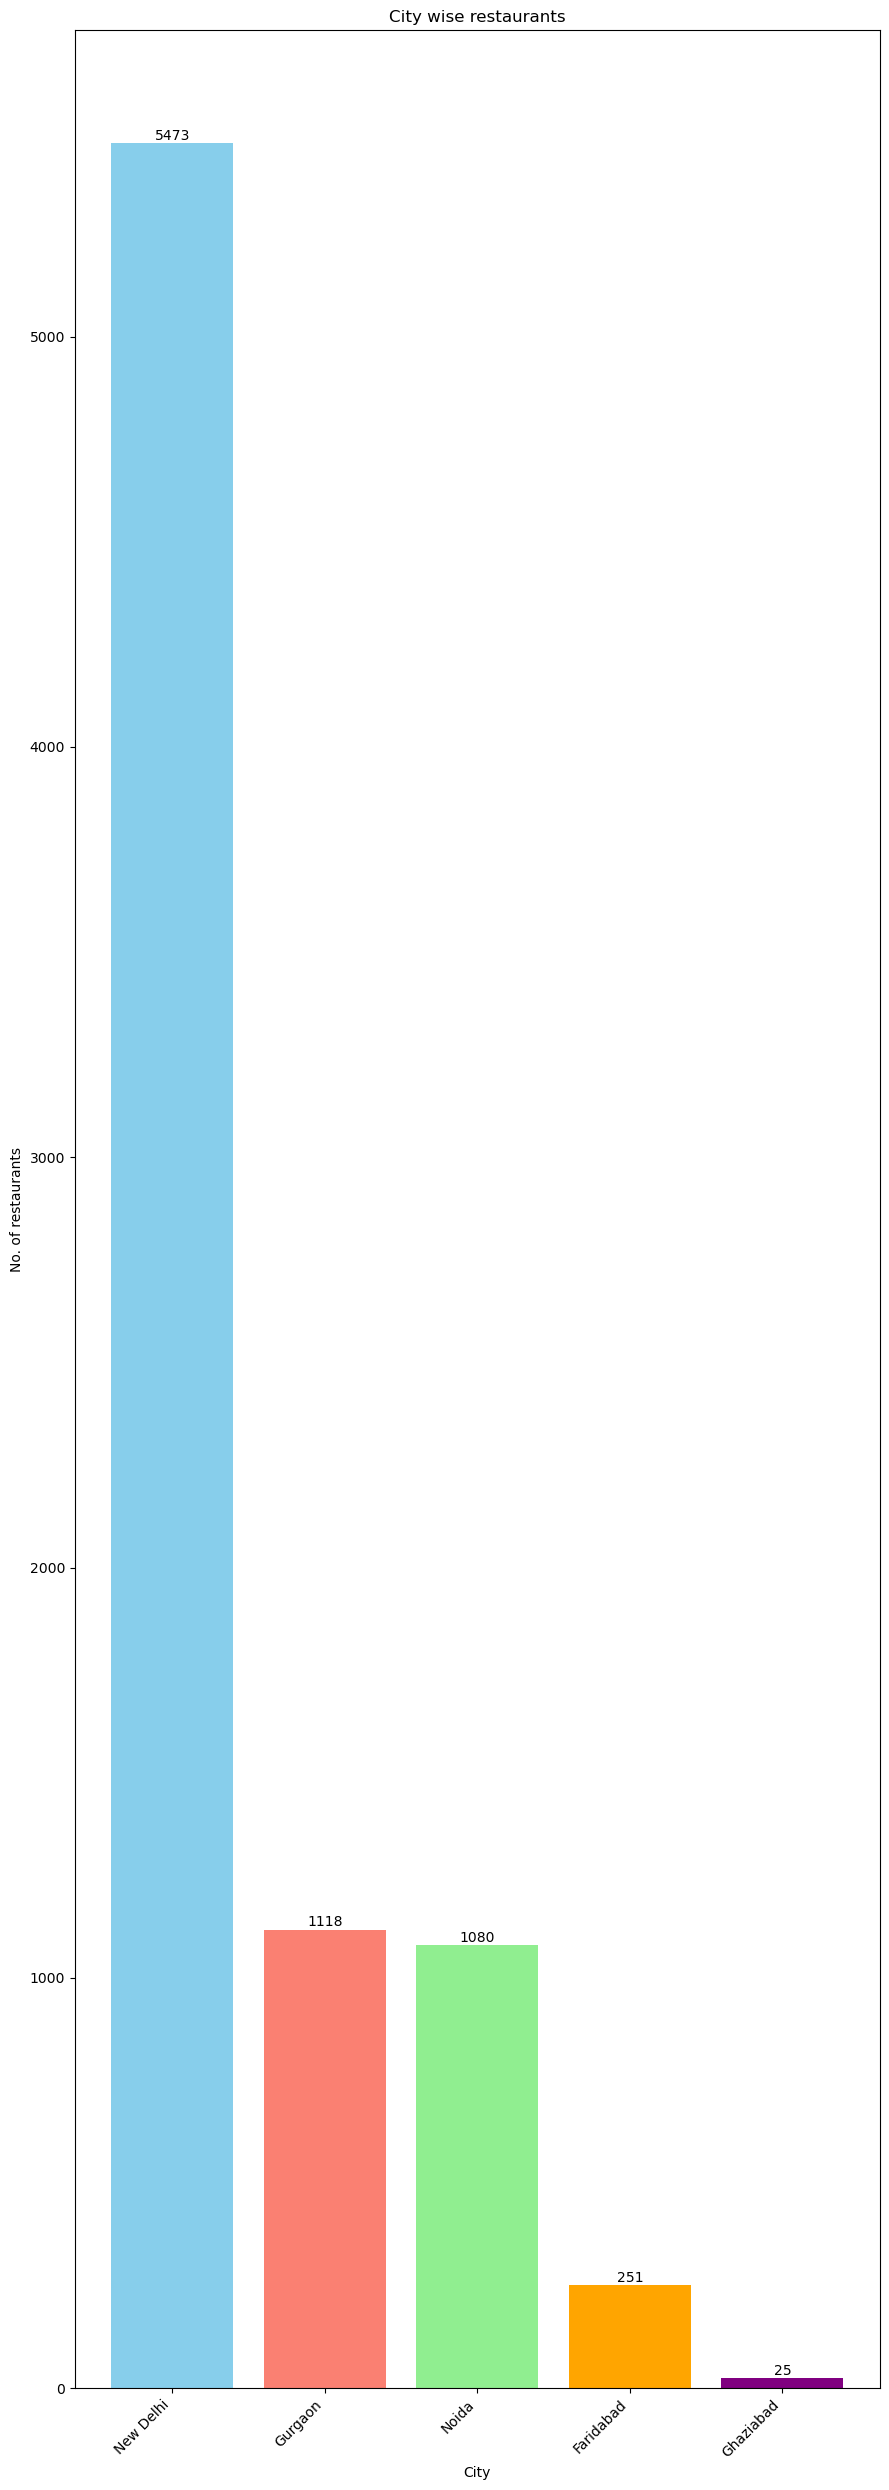

In [421]:
restaurants_percity = final_data['City'].value_counts().reset_index().head(5)
restaurants_percity.columns = ['City', 'No. of restaurants']
colors =  ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']


plt.figure(figsize=(9, 25))

bars =plt.bar(restaurants_percity['City'], restaurants_percity['No. of restaurants'], color=colors)
plt.xlabel('City')
plt.ylabel('No. of restaurants')
plt.title('City wise restaurants')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### OBSERVATION: 

From above result, it is quite clear that New Delhi has the maximum number of restaurant by 5473 and in contrast other cities like Potrero, Lakes Entrance and other cities are having only 1 restaurant.


## Finding countries with the maximum and minimum number of restaurants:


In [31]:
# No. of customer have

final_data['Country'].value_counts()


Country
India             8651
United States      425
United Kingdom      80
South Africa        60
UAE                 60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Qatar               20
Singapore           20
Canada               4
Name: count, dtype: int64

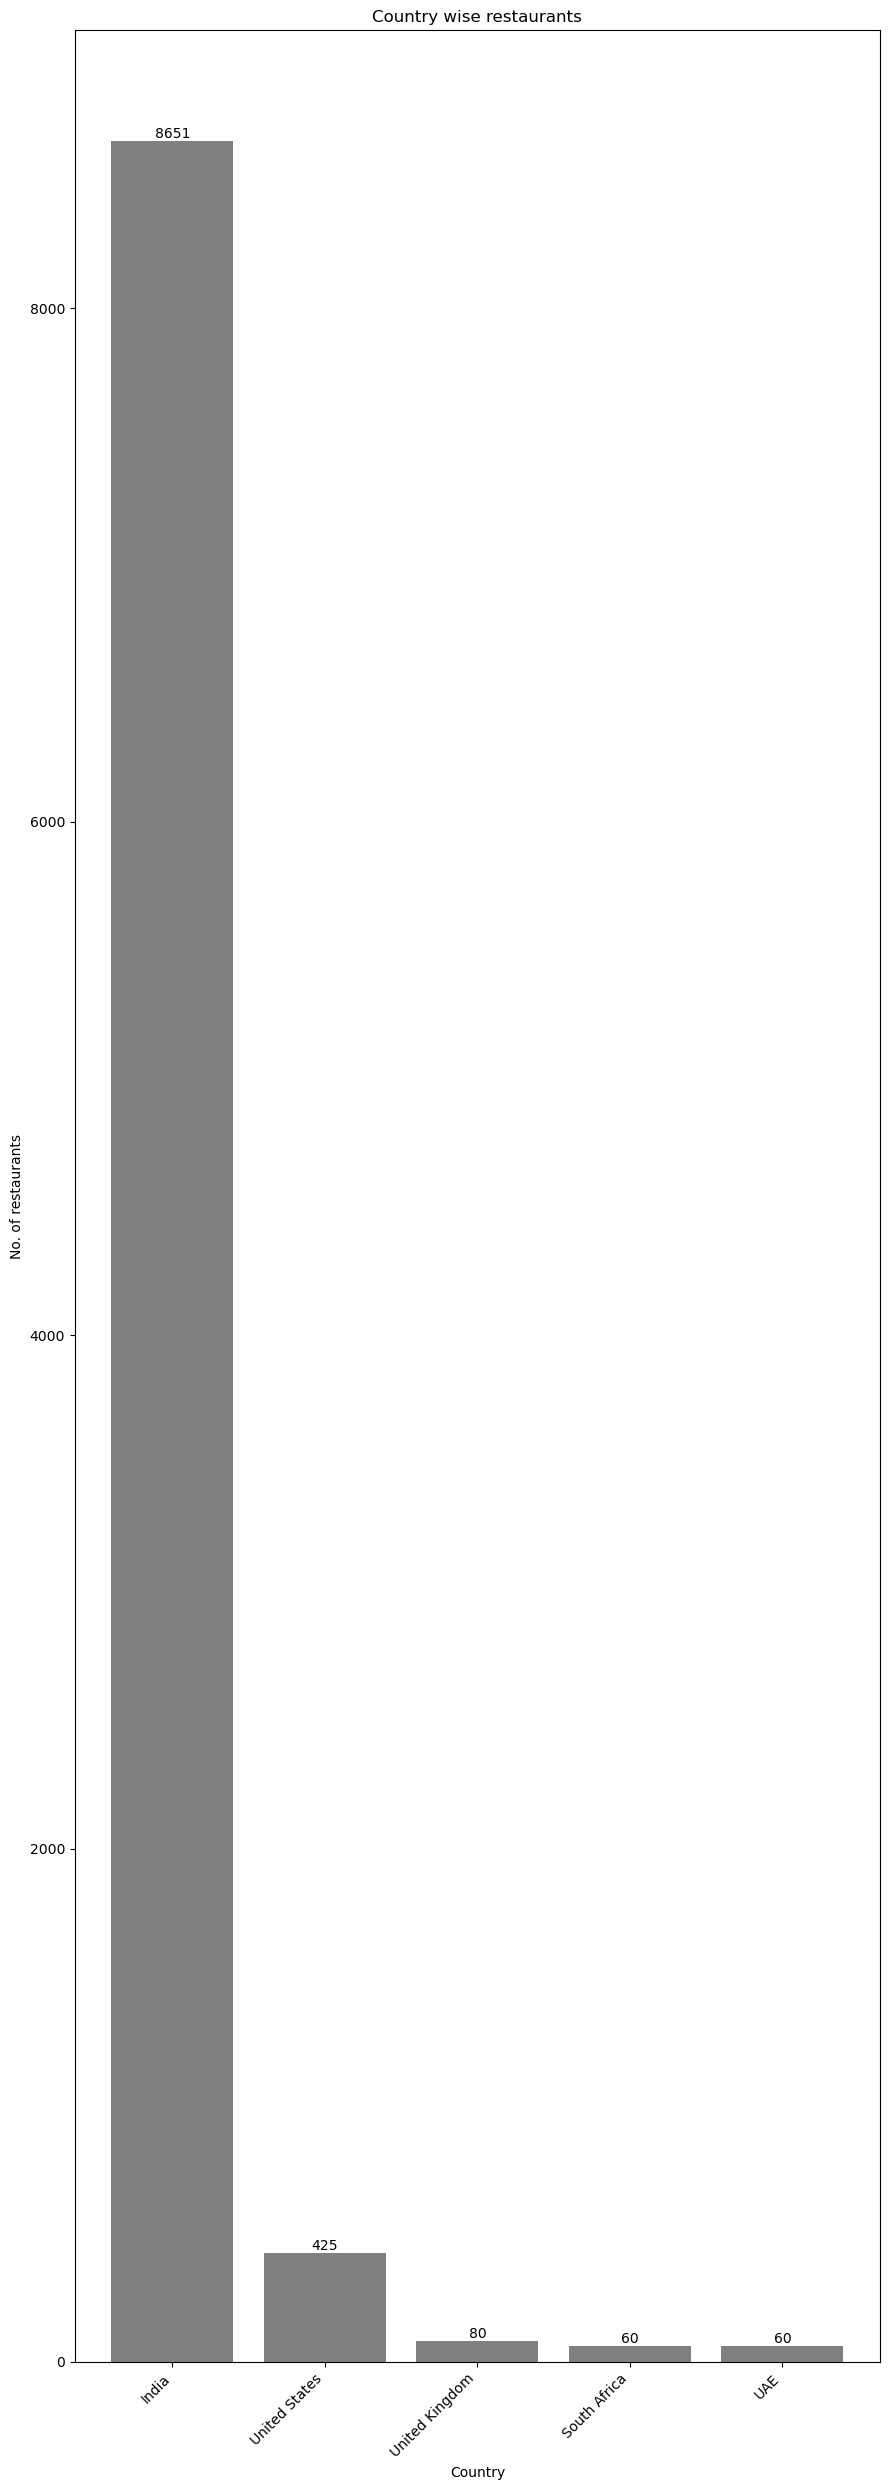

In [32]:
restaurants_per_country = final_data['Country'].value_counts().reset_index().head(5)
restaurants_per_country.columns = ['Country', 'No. of restaurants']

plt.figure(figsize=(9, 25))

bars =plt.bar(restaurants_per_country['Country'], restaurants_per_country['No. of restaurants'], color='grey')
plt.xlabel('Country')
plt.ylabel('No. of restaurants')
plt.title('Country wise restaurants')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### OBSERVATION: 

1. As per country wise, India has maximum number of restaurants 8651 and on the other hand, Canada has a miniumn number of restaurant. i.e, 4.
2. India, US, UK, South Africa and UAE are the top five country have maximum restaurants.
 



# Exploring the franchise:

In [35]:
franchise_counts = final_data.groupby(['Restaurant Name', 'Country']).size().reset_index(name='franchise_count')
top_restaurants = franchise_counts.sort_values(by='franchise_count', ascending=False).head(5)
Bottom_restaurants = franchise_counts.sort_values(by='franchise_count', ascending=False).tail(5)
franchise_counts

,Restaurant Name,Country,franchise_count
0,12212,India,1
1,Let's Burrrp,India,1
2,#45,India,1
3,#Dilliwaala6,India,1
4,#InstaFreeze,India,1
...,...,...,...
7458,t Lounge by Dilmah,India,1
7459,tashas,South Africa,1
7460,wagamama,New Zealand,1
7461,{Niche} - Cafe & Bar,India,1


In [36]:
print("Top 5 restaurants with the most franchises:")
print(top_restaurants[['Restaurant Name', 'Country', 'franchise_count']])

Top 5 restaurants with the most franchises:
       Restaurant Name Country  franchise_count
1100   Cafe Coffee Day   India               83
2100    Domino's Pizza   India               79
6115            Subway   India               63
2719  Green Chick Chop   India               51
4081        McDonald's   India               48


In [37]:
print("Bottom 5 restaurants with the least franchises:")
print(Bottom_restaurants[['Restaurant Name', 'Country', 'franchise_count']])

Bottom 5 restaurants with the least franchises:
                              Restaurant Name      Country  franchise_count
2625                                    Giapo  New Zealand                1
2624                         Giani's di Hatti        India                1
2621                    Gian Ji Punjabi Dhaba        India                1
2620  Ghungroo Club & Bar - By Gautam Gambhir        India                1
7462                      Ìàukura€Ùa Sofras€±       Turkey                1


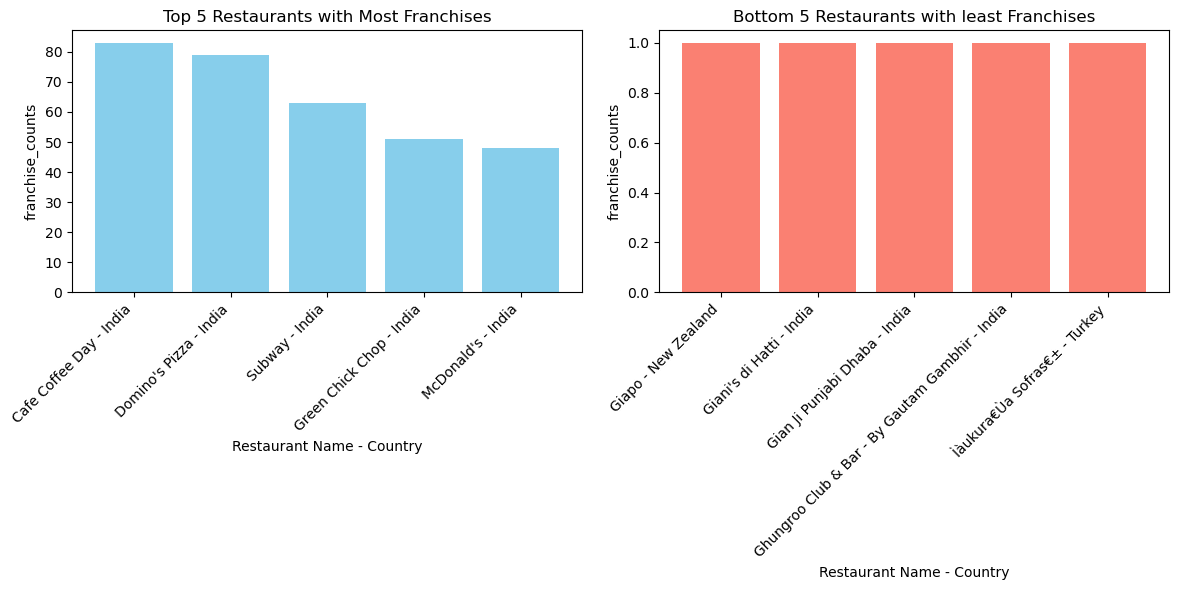

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_restaurants['Restaurant Name'] + ' - ' + top_restaurants['Country'], top_restaurants['franchise_count'], color='skyblue')
plt.xlabel('Restaurant Name - Country')
plt.ylabel('franchise_counts')
plt.title('Top 5 Restaurants with Most Franchises')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(Bottom_restaurants['Restaurant Name'] + ' - ' + Bottom_restaurants['Country'], Bottom_restaurants['franchise_count'], color='salmon')
plt.xlabel('Restaurant Name - Country')
plt.ylabel('franchise_counts')
plt.title('Bottom 5 Restaurants with least Franchises')
plt.xticks(rotation=45, ha='right')



plt.tight_layout()
plt.show()

### Observation:

1. Cafe coffee day, Domino's pizza, subway, Grenn chick chop and McDonald's are succeful franchises and have more national preference.
2. Cafe coffee day have highest franchises around 83. 
3. Giapo, Giani's di Hatti abd Gian Ji Punjabi Dhaba are one of those restaurant which have only one franchise

## Finding the ratio between restaurants that allow table booking vs. those that do not allow table booking:


In [41]:
final_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [42]:
Table_booking_allow= final_data[final_data['Has Table booking']=='Yes']['Restaurant ID'].count()
Table_booking_not_allow=final_data[final_data['Has Table booking']=='No']['Restaurant ID'].count()

print ('Table_booking_allow',Table_booking_allow )
print ('Table_booking_not_allow',Table_booking_not_allow)


Table_booking_allow 1158
Table_booking_not_allow 8383


In [43]:
print('Ratio:',round((Table_booking_allow/Table_booking_not_allow),2))


Ratio: 0.14


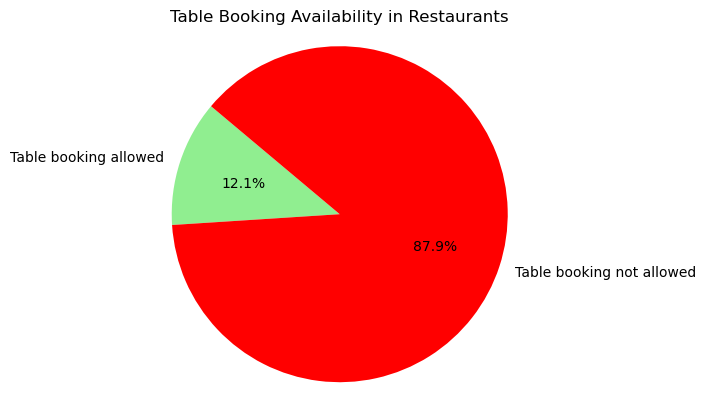

In [44]:
labels = ['Table booking allowed', 'Table booking not allowed']
sizes = [Table_booking_allow, Table_booking_not_allow]
colors = ['lightgreen', 'red']
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Table Booking Availability in Restaurants')
plt.show()


### OBSERVATION: 
The ratio of restaurants that allows table booking vs the one that does not are 0.14, means very few are having table booking options.


# Finding the percentage of restaurants providing online delivery:


In [47]:
Have_online_delivery= final_data[final_data['Has Online delivery']=='Yes']['Restaurant ID'].count()
Have_online_delivery

2451

In [48]:
Nothave_online_delivery= final_data[final_data['Has Online delivery']=='No']['Restaurant ID'].count()
Nothave_online_delivery

7090

In [49]:
percentage_have_online_delivery=Have_online_delivery/(Have_online_delivery+Nothave_online_delivery)*100
formatted_percentage = "{:.2f}".format(percentage_have_online_delivery)
print(f"Percentage of restaurants with online delivery: {formatted_percentage}%")

Percentage of restaurants with online delivery: 25.69%


In [50]:
percentage_nothave_online_delivery=Nothave_online_delivery/(Have_online_delivery+Nothave_online_delivery)*100
formatted_percentage1 = "{:.2f}".format(percentage_nothave_online_delivery)
print(f"Percentage of restaurants not have online delivery: {formatted_percentage1}%")

Percentage of restaurants not have online delivery: 74.31%


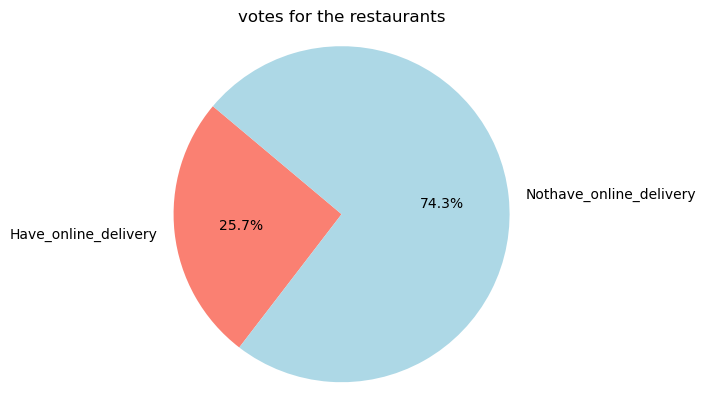

In [51]:
labels = ['Have_online_delivery', 'Nothave_online_delivery']
sizes = [Have_online_delivery, Nothave_online_delivery]
colors = ['salmon', 'lightblue']
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('votes for the restaurants')
plt.show()

### Observation:
Approve 26 %  online delivery provided by restaurant

# Difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [54]:
Votes_with_delivery= final_data[final_data['Has Online delivery']=='Yes']['Votes'].sum()
Votes_with_delivery

517914

In [55]:
Votes_without_delivery= final_data[final_data['Has Online delivery']=='No']['Votes'].sum()
Votes_without_delivery

977236

In [56]:
difference_in_votes = Votes_without_delivery - Votes_with_delivery

print(f"Difference in number of votes: {difference_in_votes}")

Difference in number of votes: 459322


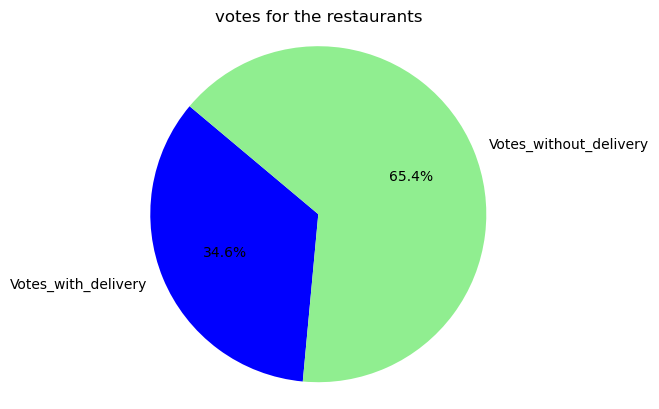

In [57]:
labels = ['Votes_with_delivery', 'Votes_without_delivery']
sizes = [Votes_with_delivery, Votes_without_delivery]
colors = ['blue', 'lightgreen']
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('votes for the restaurants')
plt.show()

# Observation:

The difference in number of votes for the restaurants that deliver and the restaurants that do not deliver:=  459322
Votes for online delivery is less due to only approx 26% online delivery serviced by restaurants

# top 10 cuisines served across cities

In [60]:
top_cuisines = final_data['Cuisines'].value_counts().head(10)
top_cuisines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

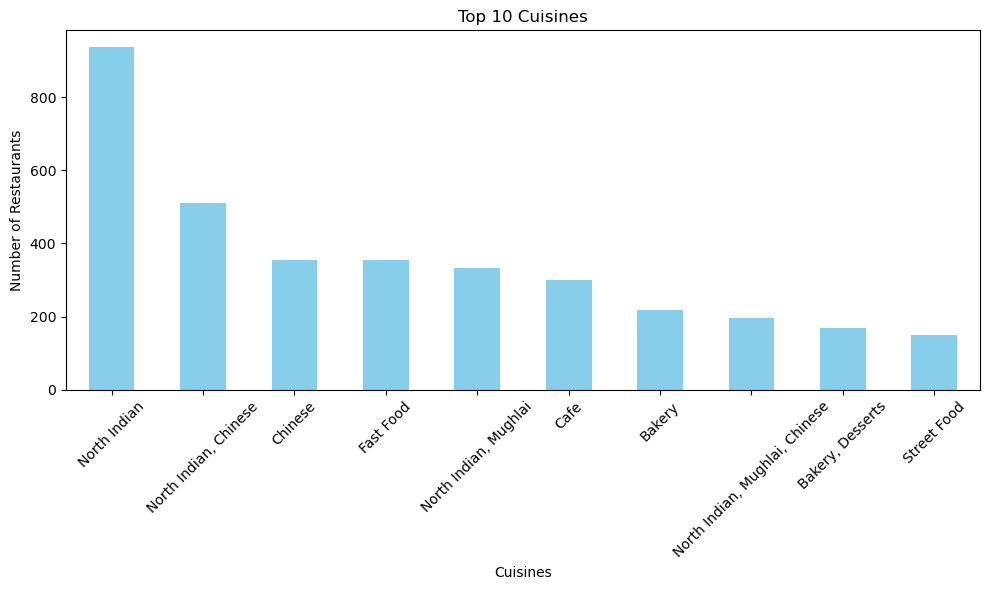

In [61]:
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# maximum and minimum number of cuisines that a restaurant serves

In [63]:
r_cuisines = final_data.groupby(['Restaurant Name','Cuisines']).agg( Count = ('Cuisines','count')).reset_index()
r_cuisines = r_cuisines.sort_values(by = 'Count', ascending = False).reset_index(drop=True)
r_cuisines.rename(columns={'Count':'Restaurant Count'}, inplace=True)
r_cuisines

,Restaurant Name,Cuisines,Restaurant Count
0,Cafe Coffee Day,Cafe,83
1,Domino's Pizza,"Pizza, Fast Food",78
2,Subway,"American, Fast Food, Salad, Healthy Food",62
3,Green Chick Chop,"Raw Meats, North Indian, Fast Food",47
4,McDonald's,"Fast Food, Burger",44
...,...,...,...
7934,Fusilli Reasons,Italian,1
7935,Funkey Monkey,"Breakfast, Coffee and Tea",1
7936,Funk House Cafe,"Cafe, Italian, Salad",1
7937,Funduz Cafe,Fast Food,1


In [64]:
r_cuisines['Cuisines'] = r_cuisines['Cuisines'].str.split(',')
r_cuisines['Cuisines Count'] = r_cuisines['Cuisines'].apply(lambda x : len(x))
r_cuisines = r_cuisines.sort_values(by = 'Cuisines Count', ascending = False).reset_index(drop=True)
r_cuisines

,Restaurant Name,Cuisines,Restaurant Count,Cuisines Count
0,Bikanervala,"[North Indian, South Indian, Fast Food, Str...",8,8
1,R' ADDA,"[Street Food, Burger, Desserts, Italian, P...",1,8
2,Healthy Food Station,"[Salad, Healthy Food, Burger, Italian, Con...",1,8
3,Marble,"[Continental, South African, Beverages, Des...",1,8
4,The Belgian Triple,"[Healthy Food, Seafood, Beverages, Belgian,...",1,8
...,...,...,...,...
7934,Aap Ki Khatir,[North Indian],1,1
7935,Aggarwal Sweets Corner,[Mithai],1,1
7936,The Second Wife Kitchen,[North Indian],1,1
7937,The Singing Tree,[Beverages],1,1


# which is the most served cuisine across the restaurant for each city:

In [66]:
final_data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [67]:
city_cuisine_counts = final_data.groupby(['City', 'Cuisines'])['Restaurant ID'].count().reset_index()
idx = city_cuisine_counts.groupby(['City'])['Restaurant ID'].transform(max) == city_cuisine_counts['Restaurant ID']
most_served_cuisines = city_cuisine_counts[idx]
most_served_cuisines

C:\Users\tb078\AppData\Local\Temp\ipykernel_8076\1582350118.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = city_cuisine_counts.groupby(['City'])['Restaurant ID'].transform(max) == city_cuisine_counts['Restaurant ID']


,City,Cuisines,Restaurant ID
0,Abu Dhabi,American,2
7,Abu Dhabi,Indian,2
12,Abu Dhabi,"Italian, Pizza",2
28,Agra,"North Indian, Mughlai",5
32,Ahmedabad,"Cafe, American, Continental, Armenian, Fast Food",1
...,...,...,...
2992,Weirton,"Burger, Greek, Sandwich",1
2995,Wellington City,Cafe,3
3010,Winchester Bay,"Burger, Seafood, Steak",1
3011,Yorkton,Asian,1


# What is the distribution cost across the restaurants? 


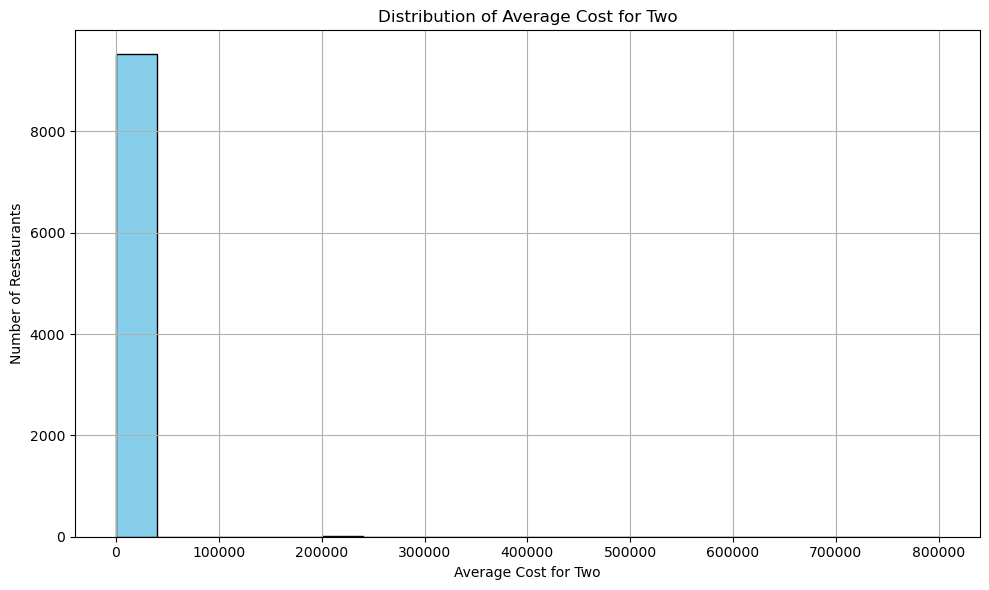

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(final_data['Average Cost for two'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.tight_layout()

plt.show()

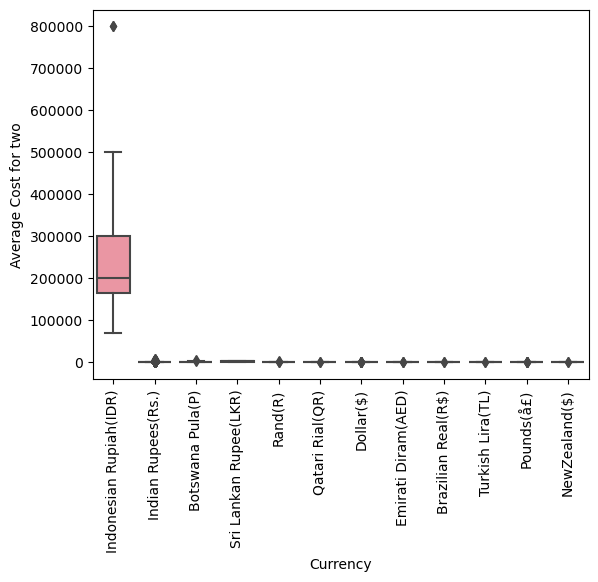

In [70]:
cost = sns.boxplot(x=final_data["Currency"],y=final_data["Average Cost for two"])
plt.xticks(rotation = 90)
plt.show()

###### Since in Indonesian currency, Average Cost for two varies between 100000 to 800000, the plot looks unequal. Other currencies are ranging between 0 and 8000

# ratings are distributed among the various factors

In [73]:
final_data['Rating_encode'] = final_data['Rating text'].replace({'Average': 0, 'Excellent':1, 'Good':2,'Not rated':3,'Poor':4,'Very Good':5})


mean_ratings = final_data[['Rating_encode', 'Aggregate rating']].mean()
mean_ratings

Rating_encode       1.788597
Aggregate rating    2.665088
dtype: float64

In [74]:
rating_counts = final_data[['Rating_encode', 'Aggregate rating']].apply(pd.Series.value_counts)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


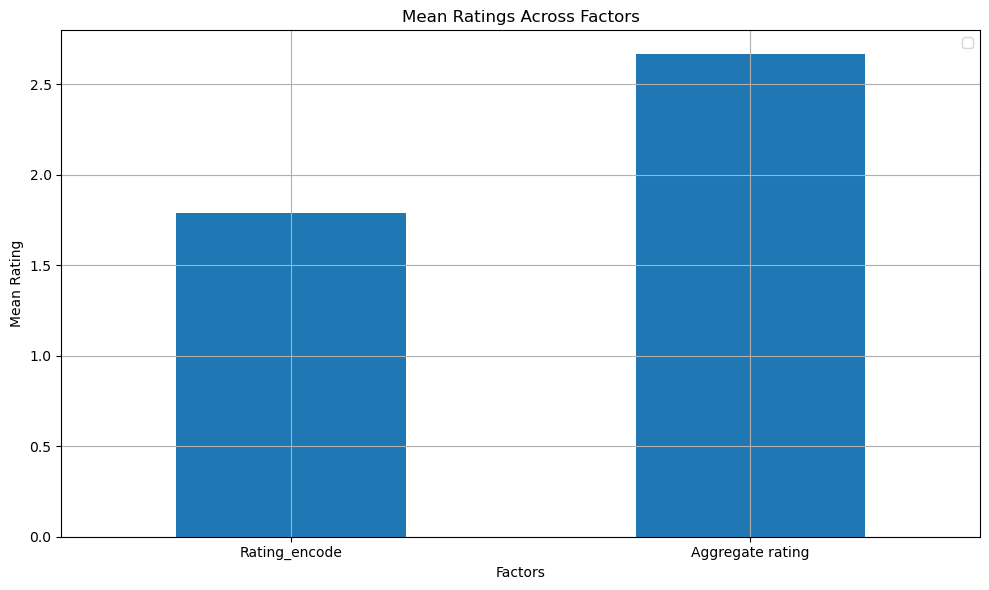

In [75]:
# Stacked Bar Chart (Mean Ratings)
mean_ratings.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mean Ratings Across Factors')
plt.xlabel('Factors')
plt.ylabel('Mean Rating')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

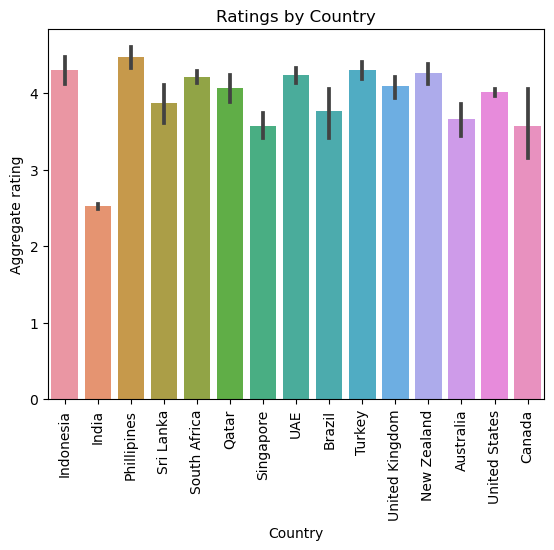

In [91]:
sns.figsize=(12, 6)
cw = sns.barplot(x = 'Country',y = 'Aggregate rating',data = final_data)
cw.set_title('Ratings by Country')
plt.xticks(rotation = 90)
plt.show()

### Cities wise rating

In [405]:
final_data = pd.DataFrame(final_data)
city_ratings = final_data[final_data['Aggregate rating'] != 0]
city_ratings = city_ratings[['Restaurant Name', 'City', 'Aggregate rating', 'Cuisines']]

In [423]:
avg_ratings_per_city = city_ratings.groupby('City')['Aggregate rating'].mean().reset_index()



In [425]:
top_city = avg_ratings_per_city.nlargest(10, 'Aggregate rating')
bottom_city = avg_ratings_per_city.nsmallest(10, 'Aggregate rating')



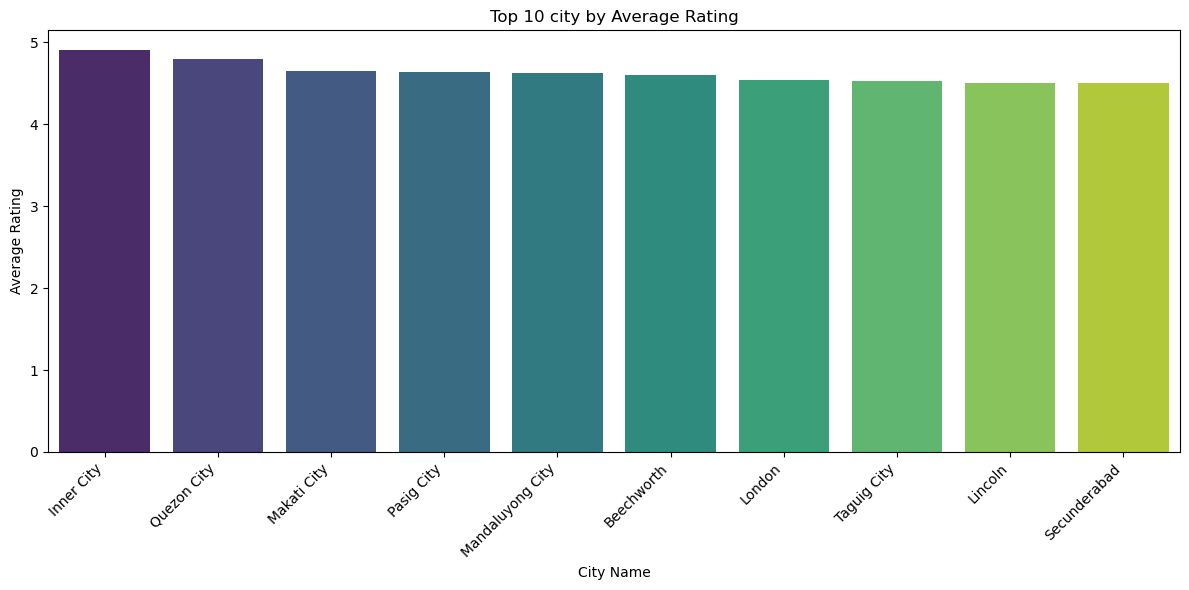

In [427]:
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Aggregate rating', data=top_city, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 city by Average Rating')
plt.xlabel('City Name')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

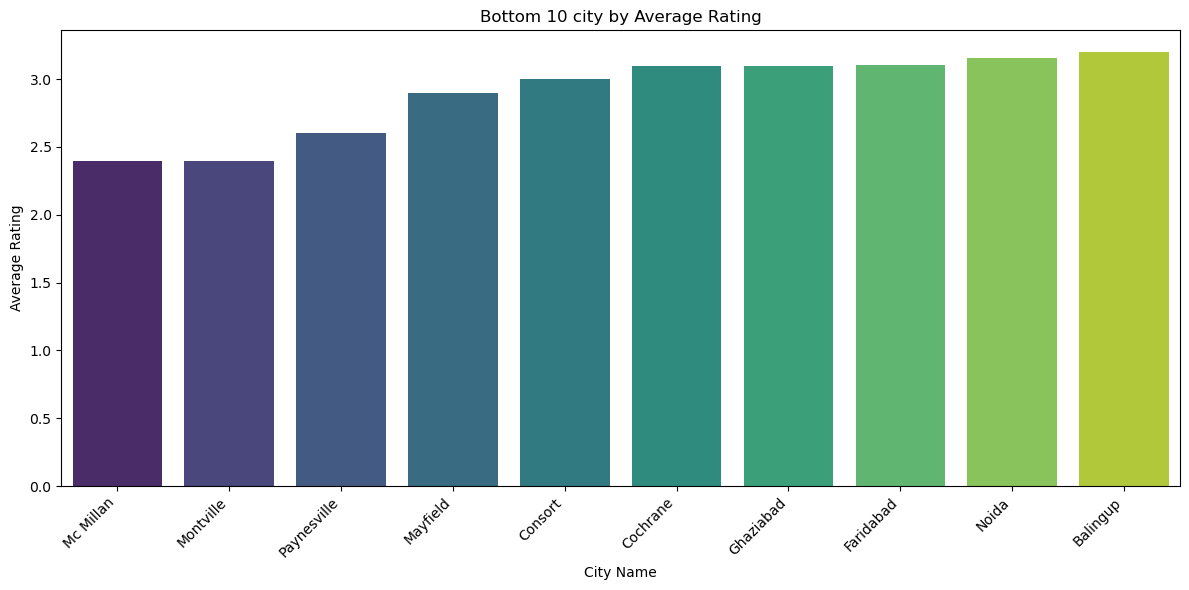

In [431]:
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Aggregate rating', data=bottom_city, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 city by Average Rating')
plt.xlabel('City Name')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

### Restaurant wise rating

In [151]:
restaurant_ratings = restaurant_ratings[restaurant_ratings['Aggregate rating'] != 0] #excluding data which are not rated

In [153]:
restaurant_ratings['Aggregate rating'] = pd.to_numeric(restaurant_ratings['Aggregate rating'], errors='coerce')
avg_ratings_per_restaurant = restaurant_ratings.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index()


In [161]:
top_restaurants = avg_ratings_per_restaurant.nlargest(30, 'Aggregate rating')
bottom_restaurants = avg_ratings_per_restaurant.nsmallest(10, 'Aggregate rating')


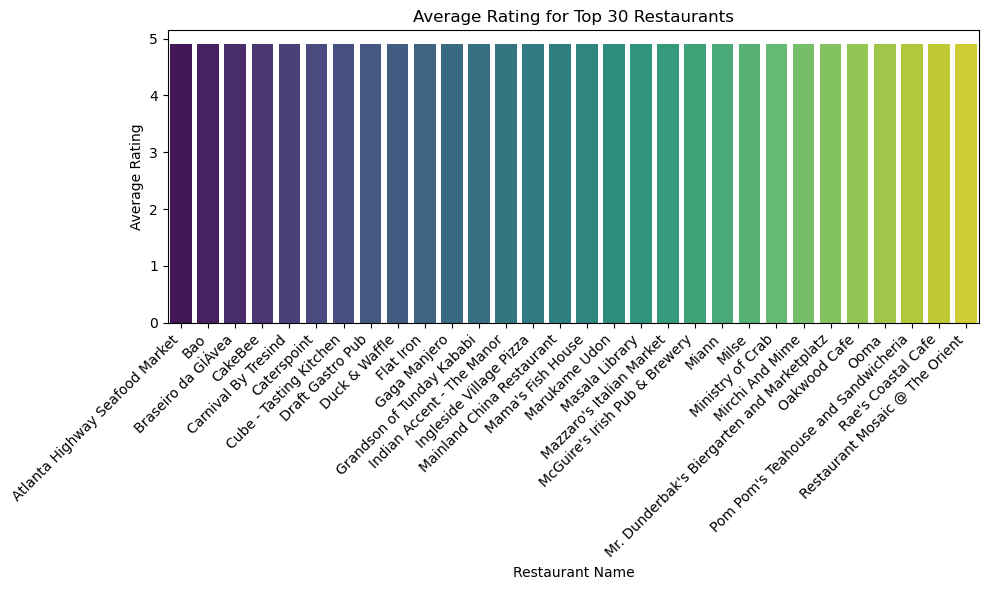

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Restaurant Name', y='Aggregate rating', data=top_restaurants, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating for Top 30 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')

# Display the plot
plt.tight_layout()
plt.show()

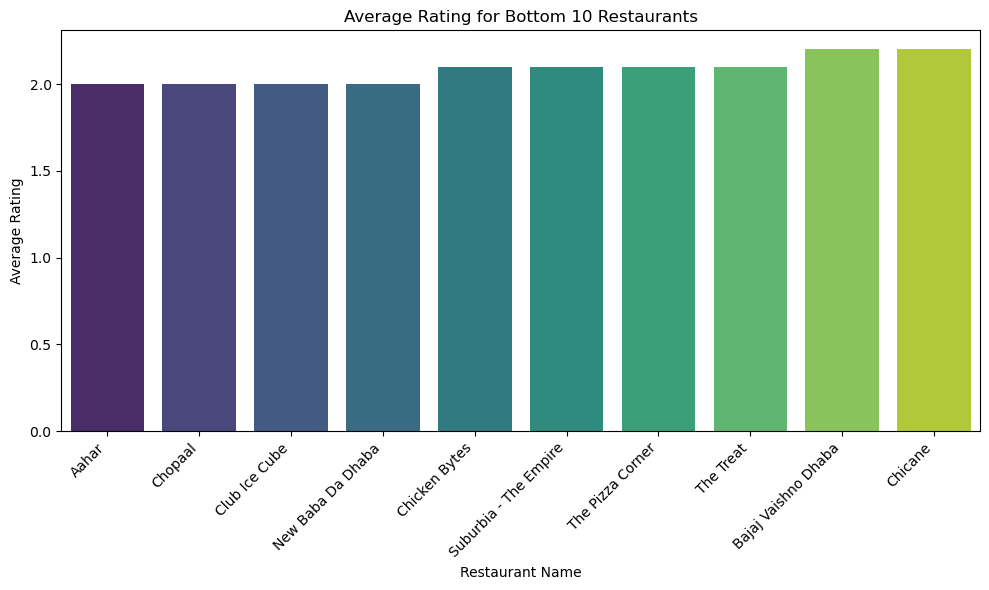

In [351]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Restaurant Name', y='Aggregate rating', data=bottom_restaurants, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating for Bottom 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')

# Display the plot
plt.tight_layout()
plt.show()

### Cuisines wise rating

In [389]:
final_data = pd.DataFrame(final_data)
Cuisines_ratings = final_data[final_data['Aggregate rating'] != 0]
Cuisines_ratings = Cuisines_ratings[['Restaurant Name', 'City', 'Aggregate rating', 'Cuisines']]


In [391]:


avg_ratings_per_cuisine = Cuisines_ratings.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

In [399]:
top_cuisines = avg_ratings_per_cuisine.nlargest(10, 'Aggregate rating')
bottom_cuisines = avg_ratings_per_cuisine.nsmallest(10, 'Aggregate rating')


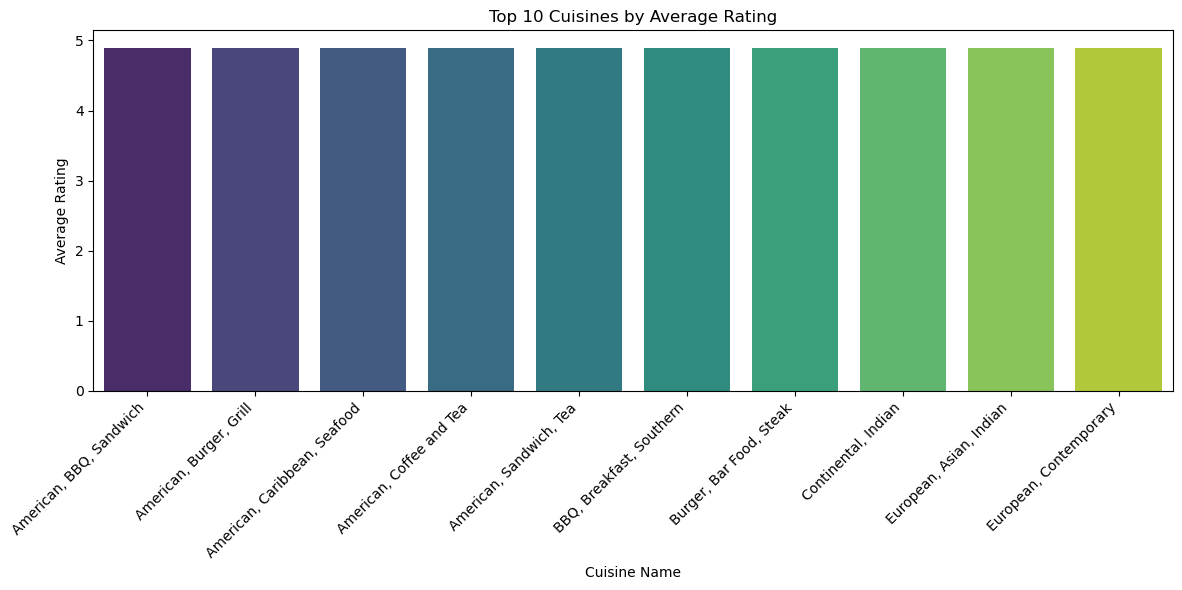

In [401]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisines', y='Aggregate rating', data=top_cuisines, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine Name')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

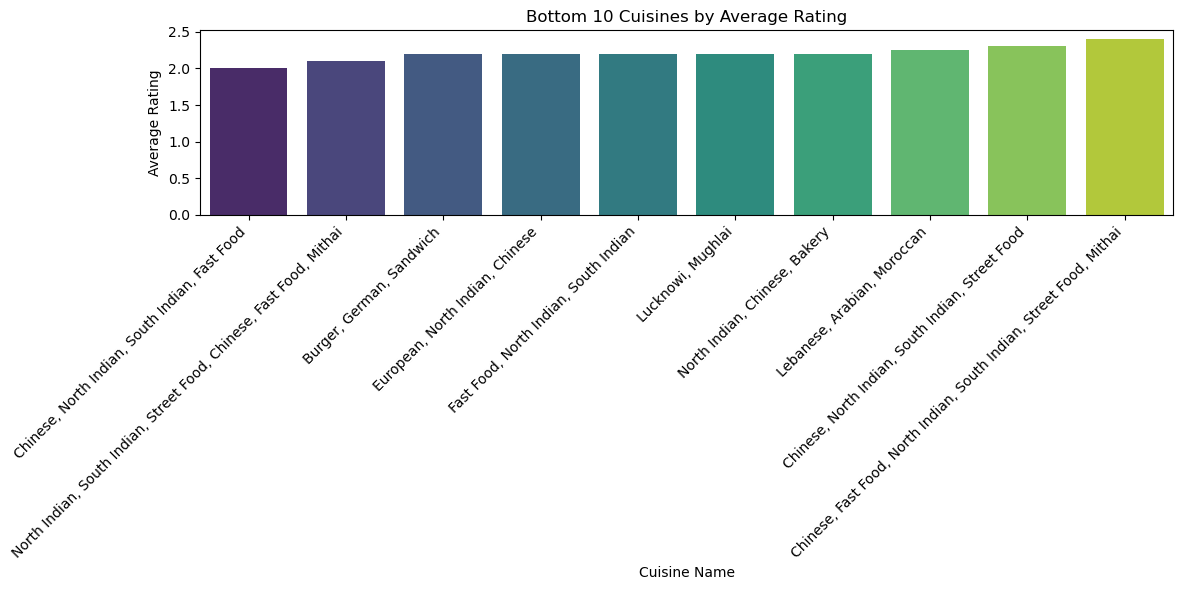

In [403]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisines', y='Aggregate rating', data=bottom_cuisines, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Cuisines by Average Rating')
plt.xlabel('Cuisine Name')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

### top 10 restaurants based on high votes, high rating

In [445]:
final_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes', 'Country', 'Rating_encode',
       'No_of_cuisines'],
      dtype='object')

In [448]:
filtered_data = final_data[(final_data['Votes'] > 200) & (final_data['Aggregate rating'] > 4.0)]

In [450]:
top_10_restaurants = filtered_data.sort_values(by=['Votes', 'Aggregate rating'], ascending=False).head(10)

In [456]:
top_10_restaurants[['Restaurant Name', 'Votes', 'Aggregate rating','City','Country','Cuisines']]

,Restaurant Name,Votes,Aggregate rating,City,Country,Cuisines
261,Toit,10934,4.8,Bangalore,India,"Italian, American, Pizza"
1651,Truffles,9667,4.7,Bangalore,India,"American, Burger, Cafe"
551,Hauz Khas Social,7931,4.3,New Delhi,India,"Continental, American, Asian, North Indian"
1241,Peter Cat,7574,4.3,Kolkata,India,"Continental, North Indian"
777,AB's - Absolute Barbecues,6907,4.6,Bangalore,India,"European, Mediterranean, North Indian"
520,Barbeque Nation,5966,4.9,Kolkata,India,"North Indian, Chinese"
392,Big Brewsky,5705,4.5,Bangalore,India,"Finger Food, North Indian, Italian, Continenta..."
647,AB's - Absolute Barbecues,5434,4.9,Hyderabad,India,"European, Mediterranean, North Indian"
776,The Black Pearl,5385,4.1,Bangalore,India,"North Indian, European, Mediterranean"
1503,BarBQ,5288,4.2,Kolkata,India,"Chinese, North Indian"


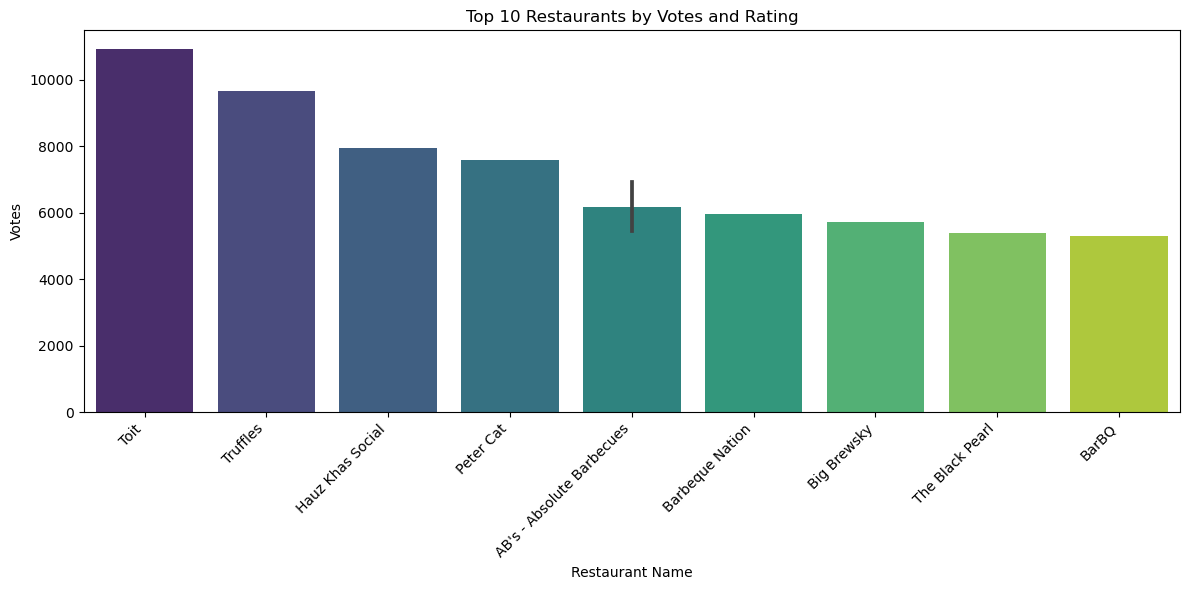

In [458]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Restaurant Name', y='Votes', data=top_10_restaurants, palette='viridis')
plt.xlabel('Restaurant Name')
plt.ylabel('Votes')
plt.title('Top 10 Restaurants by Votes and Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### bottom 10 restaurants based on high votes, high rating

In [490]:
filtered_data_bottom = final_data[
    (final_data['Votes'] <= 200) &  
    (final_data['Aggregate rating'] <= 3.0) &  
    (final_data['Aggregate rating'] != 0)  # Exclude rating == 0 considered 0 has not rated
]

In [492]:
Bottom_10_restaurants = filtered_data_bottom.sort_values(by=['Votes', 'Aggregate rating'], ascending=False).tail(10)

In [494]:
Bottom_10_restaurants[['Restaurant Name', 'Votes', 'Aggregate rating','City','Country','Cuisines']]

,Restaurant Name,Votes,Aggregate rating,City,Country,Cuisines
6021,Sugar Daddy Bakers,4,2.7,Noida,India,Bakery
6653,Wow! India,4,2.7,New Delhi,India,"North Indian, Chinese"
7111,Aviram's Chinese Kitchen,4,2.7,New Delhi,India,"Chinese, Fast Food"
2054,Chick Chicken Barbeque,4,2.6,Noida,India,"North Indian, Mughlai, Chinese"
4052,Punjabian Di Shaan,4,2.6,New Delhi,India,"North Indian, Mughlai, Chinese"
6449,9 is Mine,4,2.6,New Delhi,India,Fast Food
6840,Super Cake Shop,4,2.5,Noida,India,"Bakery, Desserts"
8012,Bansiwala Restaurant,4,2.5,Noida,India,North Indian
5389,Wah Ji Wah,4,2.4,New Delhi,India,North Indian
6649,Pandit Ji Ki Apni Rasoi,4,2.4,New Delhi,India,North Indian


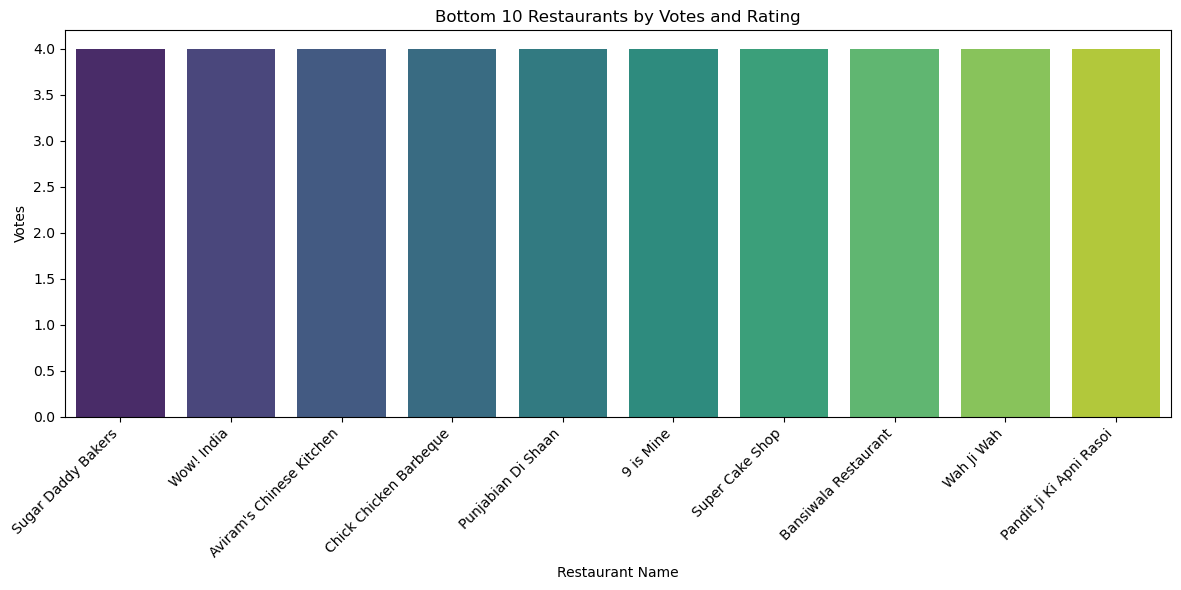

In [496]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Restaurant Name', y='Votes', data=Bottom_10_restaurants, palette='viridis')
plt.xlabel('Restaurant Name')
plt.ylabel('Votes')
plt.title('Bottom 10 Restaurants by Votes and Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Has online delivery Vs Aggregate rating:

Text(0.5, 1.0, 'Has Online delivery Vs Rating')

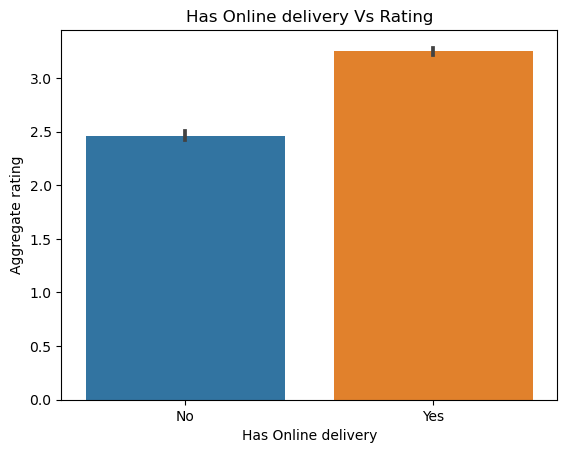

In [502]:
od = sns.barplot(x = 'Has Online delivery', y = 'Aggregate rating', data = final_data)
od.set_title("Has Online delivery Vs Rating")

### Has Table booking vs Aggregate rating:

Text(0.5, 1.0, 'Has Table booking Vs Rating')

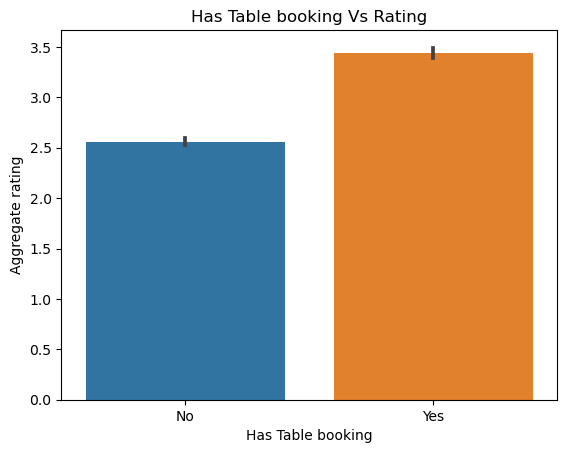

In [506]:
tb = sns.barplot(x = 'Has Table booking', y = 'Aggregate rating', data = final_data)
tb.set_title("Has Table booking Vs Rating")

# Exporting the analysed file

In [515]:
final_data.to_excel("Finalrestdata.xlsx")